# CART on Mushroom Dataset
Kaggle竞赛蘑菇数据集，22维特征
https://www.kaggle.com/uciml/mushroom-classification

## 导入工具包

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

## Reading the file

调用head函数看看每个特征的基本情况

In [2]:
# path to where the data lies
dpath = './data/'
data = pd.read_csv(dpath+"mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#数据基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

很幸运，该数据没有空值／缺失数据

### 看看是否为一个两类分类问题（poisonous，edibl）

In [4]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [5]:
#观察一下数据规模
data.shape

(8124, 23)

### 特征编码

特征全是类别型变量，很多模型需要数值型的输入（Logisstic回归、xgboost...)

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

#data.head()

LableEncoder是不合适的，因为是有序的。而颜色等特征是没有序关系。决策树等模型不care，但logistic回归不行。也可以试试OneHotEncoder

In [7]:
#X = data.iloc[:,1:23]  # all rows, all the features and no labels
#y = data.iloc[:, 0]  # all rows, label only

y = data['class']    #用列名访问更直观
X = data.drop('class', axis = 1)

### 数据集是一个文件，我们自己分出一部分来做测试吧（不是校验集）

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [9]:
columns = X_train.columns

In [10]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 分别初始化对特征和目标值的标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()

# 分别对训练和测试数据的特征以及目标值进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

## default Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

model_LR= LogisticRegression()
model_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
# 看看各特征的系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef":list(abs(model_LR.coef_.T))})
fs.sort_values(by=['coef'],ascending=False)

,columns,coef
16,veil-color,[5.963725384425371]
7,gill-size,[5.928309228104663]
6,gill-spacing,[4.8820070087060135]
10,stalk-root,[4.853268833987547]
11,stalk-surface-above-ring,[4.807868785046631]
18,ring-type,[4.388570598325485]
4,odor,[1.743455794567324]
20,population,[0.9219951733783365]
5,gill-attachment,[0.8043956265055539]
8,gill-color,[0.5145450708085891]


In [13]:
y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
   
#accuracy 
print ('The accuary of default Logistic Regression is',model_LR.score(X_test, y_pred) )

The accuary of default Logistic Regression is 1.0


In [14]:
print ('The AUC of default Logistic Regression is', roc_auc_score(y_test,y_pred))

The AUC of default Logistic Regression is 0.9585305719921104


## Logistic Regression(Tuned model)

logistic回归的需要调整超参数有：C（正则系数，一般在log域（取log后的值）均匀设置调优）和正则函数penalty（L2/L1）
目标函数为：J(theata) = sum(logloss(f(xi), yi)) + C * penalty
logistic回归: f(xi) = sigmoid(sum(wj * xj))
logloss为负log似然损失（请见课件）
L2 penalty：sum(wj^2)
L1 penalty: sum(abs(wj))

在sklearn框架下，不同学习器的参数调整步骤相同：
1. 设置候选参数集合
2. 调用GridSearchCV
3. 调用fit

In [15]:
from sklearn.linear_model import LogisticRegression

LR_model= LogisticRegression()

#设置参数搜索范围（Grid，网格）
tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }

### CV

In [16]:
# fit函数执行会有点慢，因为要循环执行 参数数目 * CV折数 次模型 训练
LR= GridSearchCV(LR_model, tuned_parameters,cv=10)
LR.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
print(LR.best_params_)

{'C': 100, 'penalty': 'l1'}


In [18]:
y_prob = LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR.score(X_test, y_pred)

1.0

In [19]:
print ('The AUC of GridSearchCV Logistic Regression is', roc_auc_score(y_test,y_pred))

The AUC of GridSearchCV Logistic Regression is 0.9728303747534518


比缺省Logistic回归高了一点点

## Default Decision Tree model

In [20]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(random_state=64)

In [21]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=64,
            splitter='best')

In [22]:
y_prob = model_tree.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_tree.score(X_test, y_pred)

1.0

In [23]:
print ('The AUC of default Desicion Tree is', roc_auc_score(y_test,y_pred))

The AUC of default Desicion Tree is 1.0


这个任务太适合决策树了

In [24]:
df = pd.DataFrame({"columns":list(columns), "importance":list(model_tree.feature_importances_.T)})
df.sort_values(by=['importance'],ascending=False)

,columns,importance
8,gill-color,0.339965
19,spore-print-color,0.212922
20,population,0.173798
7,gill-size,0.125529
4,odor,0.034029
3,bruises,0.028990
9,stalk-shape,0.025458
14,stalk-color-below-ring,0.018352
21,habitat,0.014852
10,stalk-root,0.012098


好像和Logistic回归选出的重要特征不一样。

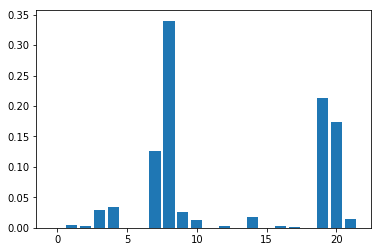

In [25]:
plt.bar(range(len(model_tree.feature_importances_)), model_tree.feature_importances_)
plt.show()

### 可根据特征重要性做特征选择

In [26]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# Fit model using each importance as a threshold
thresholds = sort(model_tree.feature_importances_)
print(thresholds)
for thresh in thresholds:
    print(thresh)
    # select features using threshold
    selection = SelectFromModel(model_tree, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)

    # train model
    selection_model = DecisionTreeClassifier()
    selection_model.fit(select_X_train, y_train)

    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1],
      accuracy*100.0))

[0.         0.         0.         0.         0.         0.
 0.         0.00142318 0.00217222 0.00296664 0.00348408 0.00396149
 0.01209812 0.01485179 0.0183515  0.02545761 0.02899014 0.03402856
 0.12552902 0.17379841 0.21292239 0.33996486]
0.0
Thresh=0.000, n=22, Accuracy: 100.00%
0.0
Thresh=0.000, n=22, Accuracy: 100.00%
0.0
Thresh=0.000, n=22, Accuracy: 100.00%
0.0
Thresh=0.000, n=22, Accuracy: 100.00%
0.0
Thresh=0.000, n=22, Accuracy: 100.00%
0.0
Thresh=0.000, n=22, Accuracy: 100.00%
0.0
Thresh=0.000, n=22, Accuracy: 100.00%
0.0014231805885495015
Thresh=0.001, n=15, Accuracy: 100.00%
0.0021722166864712594
Thresh=0.002, n=14, Accuracy: 100.00%
0.002966635994209443
Thresh=0.003, n=13, Accuracy: 100.00%
0.0034840758594661342
Thresh=0.003, n=12, Accuracy: 100.00%
0.003961485671113098
Thresh=0.004, n=11, Accuracy: 100.00%
0.012098121301435978
Thresh=0.012, n=10, Accuracy: 100.00%
0.01485178818269989
Thresh=0.015, n=9, Accuracy: 100.00%
0.018351501615989013
Thresh=0.018, n=8, Accuracy: 100

In [27]:
# Fit model using the best threshhold
thresh = 0.018
selection = SelectFromModel(model_tree, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)
# train model
selection_model = DecisionTreeClassifier()
selection_model.fit(select_X_train, y_train)
y_pred = selection_model.predict(select_X_test)
accuracy_score(y_test, y_pred)

1.0

In [28]:
import graphviz
from sklearn import tree

In [29]:
#要可视化显示 首先需要安装 graphviz   http://www.graphviz.org
dot_data = \
    tree.export_graphviz(
        model_tree,
        out_file = None,
        #feature_names = ,
        filled = True,
        impurity = True, #gini 或者熵数值是否显示
        rounded = True,
    )

In [32]:
#pip install pydotplus
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image


In [34]:
Image(graph.create_jpe())

InvocationException: GraphViz's executables not found

In [33]:
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
graph.write_png("model_tree.png")

In [ ]:
# import graphviz
# from sklearn import tree
# tree.export_graphviz(model_tree, out_file='best_tree.dot') 
# #$ dot -Tpng best_tree.dot -o best_tree.png 

In [ ]:
# #import matplotlib.image as mpimg # mpimg 用于读取图片
# #tree_omg = mpimg.imread('best_tree.png') 
# #plt.imshow(tree_omg) # 显示图片
# #plt.axis('off') # 不显示坐标轴
# #plt.show()
# #pip install Pillow
# from PIL import Image
# img=Image.open('best_tree.png')
# plt.imshow(img)
# plt.show()

## Let us tune the hyperparameters of the Decision tree model

决策树的超参数有：max_depth（树的深度）或max_leaf_nodes（叶子结点的数目）、max_features（最大特征数目）、min_samples_leaf（叶子结点的最小样本数）、min_samples_split（中间结点的最小样本树）、min_weight_fraction_leaf（叶子节点的样本权重占总权重的比例）
min_impurity_split（最小不纯净度）也可以调整

这个数据集的任务不难，深度设为2-10之间
两类分类问题，训练样本每类样本在3000左右，所以min_samples_leaf

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_DD = DecisionTreeClassifier()

max_depth = range(1,10,1)
min_samples_leaf = range(1,10,2)
tuned_parameters = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf)

In [ ]:
from sklearn.model_selection import GridSearchCV
DD = GridSearchCV(model_DD, tuned_parameters,cv=10)
DD.fit(X_train, y_train)

In [ ]:
print("Best: %f using %s" % (DD.best_score_, DD.best_params_))

In [ ]:
y_prob = DD.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
DD.score(X_test, y_pred)

In [ ]:
print ('The AUC of GridSearchCV Desicion Tree is', roc_auc_score(y_test,y_pred))

In [ ]:
DD.grid_scores_

In [ ]:
#DD.grid_scores_

test_means = DD.cv_results_[ 'mean_test_score' ]
#test_stds = DD.cv_results_[ 'std_test_score' ]
#pd.DataFrame(DD.cv_results_).to_csv('DD_min_samples_leaf_maxdepth.csv')

# plot results
test_scores = np.array(test_means).reshape(len(max_depth), len(min_samples_leaf))

for i, value in enumerate(max_depth):
    plt.plot(min_samples_leaf, test_scores[i], label= 'test_max_depth:'   + str(value))

    
plt.legend()
plt.xlabel( 'min_samples_leaf' )                                                                                                      
plt.ylabel( 'accuray' )
plt.show()

## Default Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier()

In [ ]:
model_RR.fit(X_train,y_train)

In [ ]:
y_prob = model_RR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_RR.score(X_test, y_pred)

In [ ]:
print ('The AUC of default Random Forest is', roc_auc_score(y_test,y_pred))

## Let us tuned the parameters of Random Forest just for the purpose of knowledge
1) n_estimators 2) min_sample_leaf

随机森林可调整的超参数（除了和决策树相同的参数）：n_estimators（弱学习器的数目）

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(1,10,2), 'n_estimators' : range(1,10,2) }

In [ ]:
from sklearn.model_selection import GridSearchCV
RR = GridSearchCV(model_RR, tuned_parameters,cv=10)

In [ ]:
RR.fit(X_train,y_train)

In [ ]:
print(RR.grid_scores_)

In [ ]:
print(RR.best_score_)

In [ ]:
print(RR.best_params_)

In [ ]:
y_prob = RR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
RR.score(X_test, y_pred)

In [ ]:
auc_roc=roc_auc_score(y_test,y_pred)
auc_roc

## xgboost

In [ ]:
## Default XGBoost
from xgboost import XGBClassifier
model_XGB=XGBClassifier()

model_XGB.fit(X_train,y_train)

y_prob = model_XGB.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_XGB.score(X_test, y_pred)

auc_roc=roc_auc_score(y_test,y_pred)
auc_roc

In [ ]:
### 特征重要性
#可以使用XGBoost内嵌的函数，按特征重要性排序
from xgboost import plot_importance
plot_importance(model_XGB)
plt.show()

In [ ]:
#可以根据特征重要性进行特征选择
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# Fit model using each importance as a threshold
thresholds = sort(model_XGB.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model_XGB, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1],
      accuracy*100.0))